# Computer Infrastructure Problems

This Juypter Notebook contains the problems covered in the [ATU module Computer Infrastructure](https://github.com/ianmcloughlin/computer-infrastructure/blob/main/assessment/problems.md)

# __Problem 1: Data from yfinance__

_Using the yfinance Python package, write a function called get-data() that downloads all hourly data for the previous five days for the five FAANG stocks:_

_Facebook (META)_
_Apple (AAPL)_
_Amazon (AMZN)_
_Netflix (NFLX)_
_Google (GOOG)_
_The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one._

## Install packages

First, install all packages and libraries required for this assessment. Date time will handle dates and times, pandas will create dataframes and yfinance will give access the Yohoo Finance API.  

In [4]:
# Dates and times.
# https://docs.python.org/3/library/datetime.html
import datetime as dt

# Data frames.
# https://pandas.pydata.org/docs/
import pandas as pd


# Yahoo Finance data.
# https://ranaroussi.github.io/yfinance/reference/index.html
import yfinance as yf

# os module for file system operations.
# https://docs.python.org/3/library/os.html
import os


## Define the function.

This function will download hourly data for the previous 5 days for FAANG stocks and saves it as a CSV file. 

The FAANG stocks are: 

Facebook (META)

Apple (AAPL)

Amazon (AMZN)

Netflix (NFLX)

Google (GOOG)

## Create a Tickers object to work with multiple tickers at once.

Tickers are the identifiers for the function to pull the stock data from the desired company.

See [Github.com](https://github.com/ranaroussi/yfinance#tickers) for more information on tickers with yfinance.

## Download the data using yfinance.

Uses yf.download to retrieve historical data for multiple tickers at once.

This will returns a pandas DataFrame with a MultiIndex columns (attribute, ticker).

See [Github.com](https://github.com/ranaroussi/yfinance#download) for more information on downloading data with yfinance.

## Save the data to a CSV file with a timestamped filename

The filename format is YYYYMMDD_HHMMSS.csv.

See [pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) for more information on how to save the data to a timestamped CSV file.

In [5]:
# Create a function to get the data from Yahoo Finance and save it as a CSV file
def get_data():
    # Download data using yfinance (hourly interval, past 5 days)
    # Define FAANG tickers
    df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")


 # Create data folder directory in the repository.
    data_dir = os.path.join(os.getcwd(), "data")
    # exist ok=True to avoid error if the folder already exists. If rerunning the code to test, it won't fail or make duplicate folders.
    os.makedirs(data_dir, exist_ok=True)
    
    df.to_csv(f"data/{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv")
    return get_data

get_data()


C:\Users\laura\AppData\Local\Temp\ipykernel_17744\2009409087.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
[*********************100%***********************]  5 of 5 completed


<function __main__.get_data()>

# __Problem 2: Plotting Data__

_Write a function called plot-data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one._

## Install packages.

First, install packages.

In [17]:
# Dates and times.
# https://docs.python.org/3/library/datetime.html
import datetime as dt

# Data frames.
# https://pandas.pydata.org/docs/
import pandas as pd

# Plotting.
# https://matplotlib.org/stable/api/pyplot_api.html
import matplotlib.pyplot as plt


## Download data

C:\Users\laura\AppData\Local\Temp\ipykernel_17744\3077721694.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


<Axes: xlabel='Datetime'>

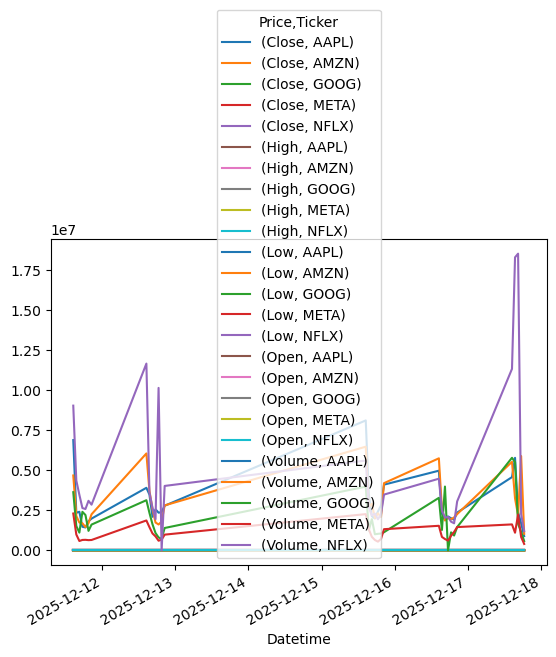

In [18]:
# Get data.
df = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')

# Show all the data.
df.plot()

Taking a look at the columns to plot closing data for each of the five companies.

In [19]:
# Show columns. 
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

## Plot data

Generate plots for each of the five companies closing price, as well as show all five of them all on the one plot. 

See MatPlot Lib [Documentation](https://matplotlib.org/stable/users/explain/axes/axes_intro.html) for reference.

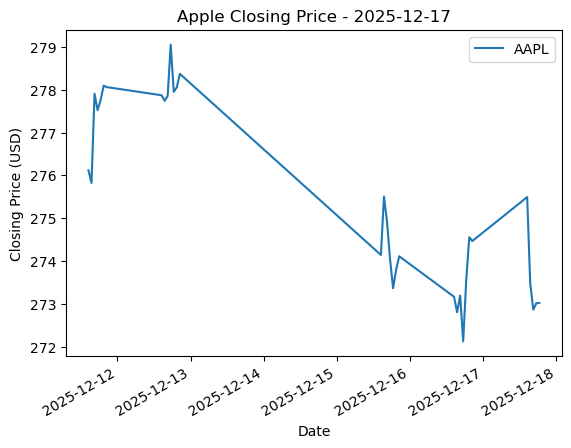

In [20]:
# Add axis labels, a legend, and the date as a title to the Apple closing price plot
ax = df[('Close', 'AAPL')].plot()

# Set x-axis label
ax.set_xlabel('Date')

# Set y-axis label
ax.set_ylabel('Closing Price (USD)')

# Add a legend
ax.legend(['AAPL'])

# Set the plot title to today's date
import datetime as dt
ax.set_title(f"Apple Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show the plot 
plt.show()

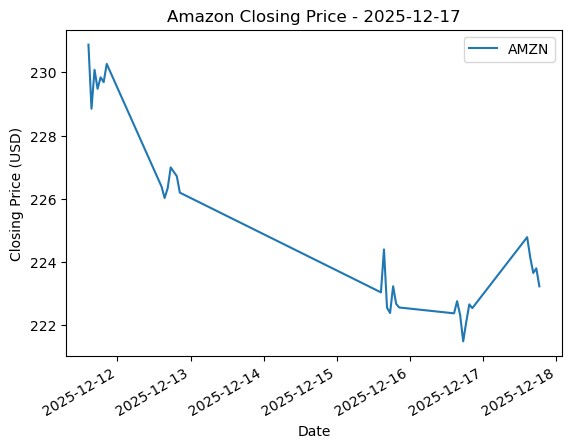

In [21]:
# Add axis labels, a legend, and the date as a title to the Amazon closing pric
ax = df[('Close','AMZN')].plot()

# Set x-axis label
ax.set_xlabel('Date')

# Set y-axis label
ax.set_ylabel('Closing Price (USD)')

# Add a legend
ax.legend(['AMZN'])

# Set the plot title to today's date
import datetime as dt
ax.set_title(f"Amazon Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show the plot 
plt.show()

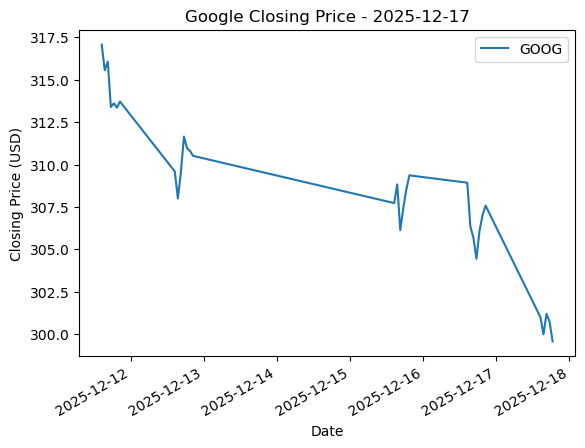

In [22]:
# Add axis labels, a legend, and the date as a title to the Google closing pric
ax = df[('Close','GOOG')].plot()

# Set x-axis label
ax.set_xlabel('Date')

# Set y-axis label
ax.set_ylabel('Closing Price (USD)')

# Add a legend
ax.legend(['GOOG'])

# Set the plot title to today's date
import datetime as dt
ax.set_title(f"Google Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show the plot 
plt.show()

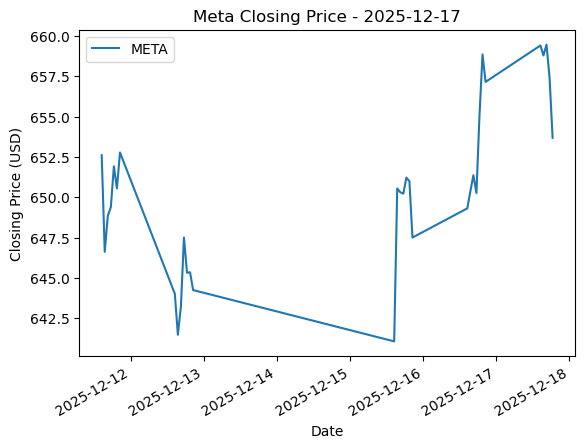

In [23]:
# Add axis labels, a legend, and the date as a title to the Meta closing price
ax = df[('Close','META')].plot()

# Set x-axis label
ax.set_xlabel('Date')

# Set y-axis label
ax.set_ylabel('Closing Price (USD)')

# Add a legend
ax.legend(['META'])

# Set the plot title to today's date
import datetime as dt
ax.set_title(f"Meta Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show the plot 
plt.show()

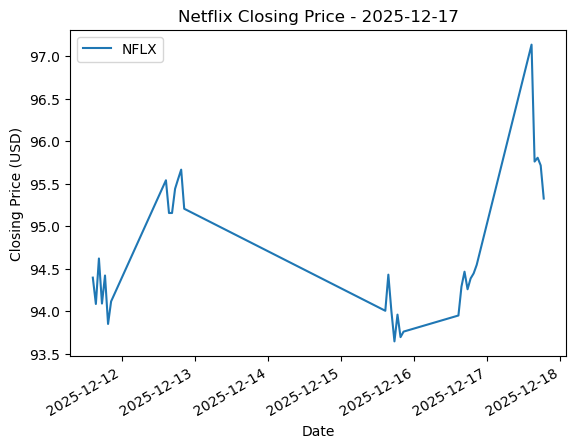

In [24]:
# Add axis labels, a legend, and the date as a title to the Netflix closing price.
ax = df[('Close','NFLX')].plot()

# Set x-axis label.
ax.set_xlabel('Date')

# Set y-axis label.
ax.set_ylabel('Closing Price (USD)')

# Add a legend.
ax.legend(['NFLX'])

# Set the plot title to date of Data.
import datetime as dt
ax.set_title(f"Netflix Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show.
plt.show()

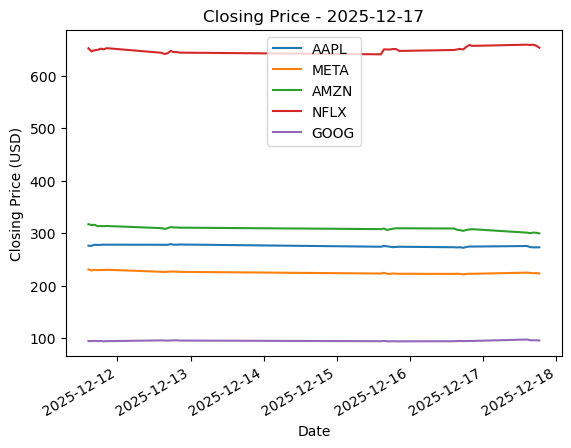

In [25]:

# Add axis labels, a legend, and the date as a title to the closing price of the five companies.
ax = df['Close'].plot()

# Set x-axis label
ax.set_xlabel('Date')

# Set y-axis label
ax.set_ylabel('Closing Price (USD)')

# Add a legend
ax.legend(['AAPL', 'META','AMZN', 'NFLX', 'GOOG'])

# Set the plot title to today's date
import datetime as dt
ax.set_title(f"Closing Price - {dt.datetime.now().strftime('%Y-%m-%d')}")

# Show the plot 
plt.show()

# Current date and time.
now = dt.datetime.now()

# File name.
filename = "plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"





## Save the figs 

See Matplotlib [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) for reference 

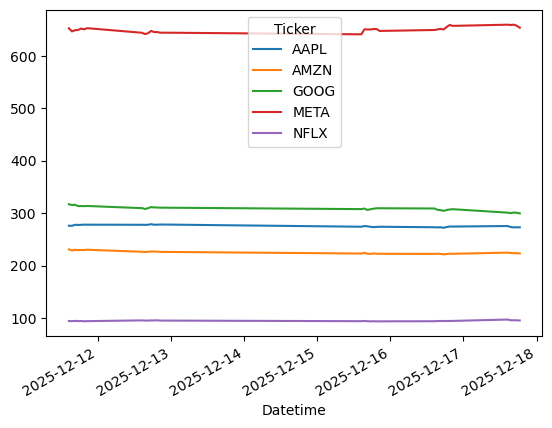

In [26]:
# Create new figure and axis.
fig, ax = plt.subplots()

# Plot all closing prices.
df['Close'].plot(ax=ax)

# Current date and time.
now = dt.datetime.now()

# File name.
filename = "plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"

# Save figure.
fig.savefig(filename, dpi=300)

# __Problem 3: Script__

_Create a Python script called faang.py in the root of your repository. Copy the above functions into it and make it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook._

`./faang.py`


When run, this script downloads the FAANG stock data using YFinance, saves the data as a timestamped CSV file and generates and saves a plot of closing prices

Shebang line:

`#! /usr/bin/env python`

This line has to be the first line in the script. It tells the os  which interpreter to use when executing the file. It finds the first available python interpreter in the user’s environment.

Without this line, the OS would not know how to execute the file directly.


The faang.py script serves two functions. 

Firstly it downloads the FAANG stock data.

`def get_data():`
    `data = yf.download(`
        `["META", "AAPL", "AMZN", "NFLX", "GOOG"],`
        `period="5d",`
        `interval="1h"`
   ` )`
   ` data.to_csv(f"data/{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv")`
    `return data`

    `get_data()`


This downloads the stock data for the last 5 days. It uses hourly intervals and saves the data to the data directory with a timestamped filename.

Secondly it plots the data.

`def plot_data():`
    `list_of_files = glob.glob('data/*.csv')`
    `latest_file = max(list_of_files, key=os.path.getctime)`

`    data = pd.read_csv(`
`        latest_file,`
`        header=[0, 1],`
`        index_col=0,`
`        parse_dates=True`
`    )`


This finds all CSV files in the data/ directory, selects the most recently created file and loads it into a Pandas DataFrame.

`fig = data.plot(`
`    y='Close',`
`    title='FAANG Stock Prices Over the Last 5 Days',`
`    xlabel='Date',`
`    ylabel='Closing Price',`
`    rot=30,`
`    legend=True`
`)`

This plots closing prices for all stocks, formats axis labels and title and then rotates date labels for readability.

`fig.figure.savefig(f"plots/{os.path.splitext(latest_file)[0][5:]}.png")`

This stores the plot in the plots/ directory and uses the same timestamp as the CSV file.


# __Problem 4: Automation__

_Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow._


Create the folder .github/workflows/ in the root of the repository and used both the github actions demo and the [GitHub 
actions documentation](https://docs.github.com/en/actions/get-started/quickstart) to create a yml file called faang.yml that tells GitHub to trigger the workflow every Saturday morning and that 
workflow runs the faang.py file in the root of the repository which then downloads the data and creates the appropriate graphs associated with 
that data.

`name: Production of FAANG Report`

This sets the name of the workflow.

This is visible in the GitHub Actions tab.


`run-name: ${{ github.actor }} is creating automated FAANG Report`

This names each workflow run.

${{ github.actor }} inserts the GitHub username that triggered the workflow.


`on:`
  `schedule:`
  
 `   # From: https://crontab.guru/#0_8_*_*_6`
 ` - cron: '0 8 * * 6'`
`
This defines when the workflow should run. It schedules the workflow for 08:00 UTC every Saturday. 

# Cron further explaination

Below is the Cron scheduling explained further. See [Crontab.guru](https://crontab.guru/#0_8_*_*_6) for reference.

| Field   | Value | Meaning     |
| ------- | ----- | ----------- |
| Minute  | `0`   | At minute 0 |
| Hour    | `8`   | 08:00 UTC   |
| Day     | `*`   | Every day   |
| Month   | `*`   | Every month |
| Weekday | `6`   | Saturday    |


  ` workflow_dispatch:` 

  This allows the workflow to be triggered manually from GitHub’s UI.


`permissions: write-all`

This grants the workflow permission to commit files, push changes to the file back to the repository. This is required for automated Git commits.


`jobs:`
  `Create_FAANG_Report:`

This defines a single job named Create_FAANG_Report.


 `name: Create FAANG Report`

This gives the name of job shown in the Actions UI

`runs-on: ubuntu-latest`

This specifies the runner environment.

It uses GitHub’s latest Ubuntu virtual machine.

`- name: Checkout Repository`
`  uses: actions/checkout@v4`

This downloads the repository content to the runner.

it is required so the workflow can access faang.py.

`- name: Set up Python`
`  uses: actions/setup-python@v3`
 ` with:`
   ` python-version: '3.x'`

This installs Python on the runner and uses the latest available Python 3 version.


`- name: Install Dependencies`
`  run: |`
`    pip install -r requirements.txt`

This installs all Python dependencies listed in requirements.
txt. This ensures the yfinance package is available without 
issue.


`- run: |`
`    echo "Starting FAANG Report Creation"`

This executes the script directly using its executable permission.

${GITHUB_WORKSPACE} is the root of the repository on the runner.

Further information on ${GITHUB_WORKSPACE} available at [Stackoverflow.com](https://stackoverflow.com/questions/70626870/how-do-i-access-the-root-of-the-github-repository-in-a-github-action)

`- run: |`
 `   echo "FAANG Report Created Successfully"`

 This confirms successful script execution in the logs.


`-- name: "Commit and Push Changes"`-
`-  run: |`-
 `-   git config --global user.name "${{ github.actor }}"`-
 `-   git config --global user.email "${{ github.actor }}@users.noreply.github.com"`-

 This configures Git identity for the automated commit. It adds a username and an email address.


 `   git add .`

This stages all changes.

` git commit -m "Automated update of FAANG Report" || echo "No changes to commit" `

This commits changes if there are any. It also prevents workflow failure if nothing changed.

 `   git push origin HEAD:main `   

This pushes the commit back to the main branch.

 ` - run: | ` 
   `   echo "FAANG Report Changes Pushed Successfully" ` 
   
   Finally this outputs a final success message.
